In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

<span style="font-size:24px; color:#1f3b4d; font-weight:bold;">🏙️ Introduction: Exploring Public Salaries in San Francisco</span>
<br>

<span style="font-size:17px; color:#34495e;">
San Francisco serves as the heart of the 13<sup>th</sup>-most populous metropolitan statistical area in the United States,  
home to nearly <b>4.6 million residents as of 2023</b>. Even more impressively, the broader <b>San Jose–San Francisco–Oakland combined statistical area</b> ranks as the <b>5<sup>th</sup>-largest urban region</b> in the country, with an estimated population exceeding <b>9 million</b>.
<br>
In such a dynamic, high-cost urban environment, public sector compensation plays a crucial role in attracting and retaining talent across city departments.  
In this notebook, we aim to uncover <b>patterns, trends, and interesting facts</b> about public employee salaries using historical data.  
<br>
Through this data-driven journey, we’ll walk through key questions that touch on <b>base pay, benefits, overtime trends, and job roles</b> — all to better understand how San Francisco compensates its workforce.
</span>

<h2 style="color:#2c3e50;"> Exploratory Data Analysis Questions</h2>

<ul style="font-size:16px; color:black">
  <li>What is the average <b>BasePay</b> across different years?</li>
  <li>Which <b>job title</b> has the highest <b>TotalPay</b>?</li>
  <li>What percentage of employees receive <b>OvertimePay</b>?</li>
  <li>Is there a relationship between <b>job type</b> and additional earnings (<b>OvertimePay</b> and <b>OtherPay</b>)?</li>
  <li>Who is the <b>highest-paid employee</b> in the dataset?</li>
  <li>Which job titles have the highest average <b>Benefits</b>?</li>
  <li>How do employee salaries change over time? Is there a noticeable <b>increase or decrease</b>?</li>
</ul>

_____________________________

<span style="font-size:24px; color:#2c3e50">Reading the CSV file</span>



In [48]:
df = pd.read_csv('Salaries.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [50]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

<span style="font-size:24px; color:#2c3e50; font-weight:bold;">🧹 Data Cleaning Steps</span>
<br>

Before conducting any analysis, it was important to clean and standardize the dataset to ensure accuracy and consistency.  
Here are the key steps that were taken:

<ul style="font-size:18px; color:#34495e;">
  <li><b>Replaced missing strings:</b> Entries labeled <code>'Not Provided'</code> were replaced with <code>0</code> to allow proper numeric conversion.</li>
  
  <li><b>Converted pay-related columns to float:</b> The columns <code>BasePay</code>, <code>OvertimePay</code>, <code>OtherPay</code>, and <code>Benefits</code> were cast to <code>float</code> to support aggregation and visualization.</li>
  
  <li><b>Filled missing values:</b> Missing values in <code>BasePay</code> and <code>Benefits</code> were filled with their respective column means.</li>
  
  <li><b>Removed irrelevant columns:</b> Dropped columns <code>'Notes'</code> and <code>'Status'</code> since they were not useful for the analysis.</li>
  
  <li><b>Standardized the Year column:</b> Converted <code>Year</code> to <code>str</code> type to support grouping and labeling in charts.</li>
</ul>

In [51]:
df = df.replace('Not Provided', 0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [53]:
df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']] = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].astype(float)

In [54]:
mean_basepay = df['BasePay'].mean()
mean_Benefits = df['Benefits'].mean()

In [55]:
df['BasePay'].fillna(mean_basepay, inplace=True)  
df['Benefits'].fillna(mean_Benefits, inplace=True)  

In [56]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [57]:
df.drop([ 'Notes','Status'], axis=1, inplace=True)

In [58]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [59]:
df['Year'] = df['Year'].astype(str)

__________________________________________________________

<span style="font-size:24px; color:#2c3e50">Descriptive Analytics</span>


In [60]:
df.describe(include=['object'])

,EmployeeName,JobTitle,Year,Agency
count,148654,148654,148654,148654
unique,110811,2159,4,1
top,Kevin Lee,Transit Operator,2014,San Francisco
freq,13,7036,38123,148654


In [61]:
df.select_dtypes(include=['number']).quantile([0.25, 0.75])

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0.25,37164.25,33840.505,0.0000,0.0000,22338.635,36168.995,44065.65
0.75,111490.75,94605.740,4657.6325,4235.9075,33468.980,105839.135,132876.45


IQR

In [62]:
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)

IQR = Q3 - Q1

IQR

Id                  74326.5000
BasePay             60765.2350
OvertimePay          4657.6325
OtherPay             4235.9075
Benefits            11130.3450
TotalPay            69670.1400
TotalPayBenefits    88810.8000
dtype: float64

___________________________________

<span style="font-size:24px; color:#2c3e50">Positive Skew</span>


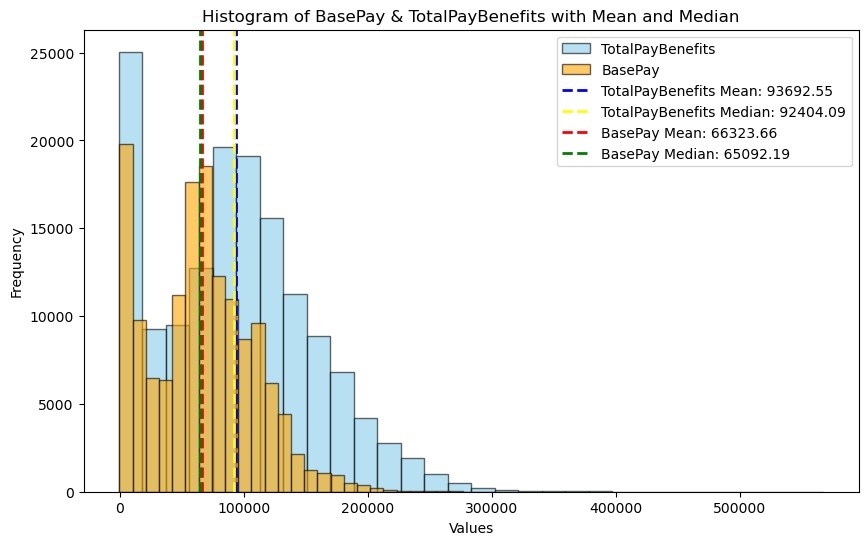

In [63]:
mean_total = np.mean(df['TotalPayBenefits'])
median_total = np.median(df['TotalPayBenefits'])

mean_base = np.mean(df['BasePay'])
median_base = np.median(df['BasePay'])

plt.figure(figsize=(10,6))
plt.hist(df['TotalPayBenefits'], bins=30, color='skyblue', edgecolor='black', alpha=0.6, label='TotalPayBenefits')
plt.hist(df['BasePay'], bins=30, color='orange', edgecolor='black', alpha=0.6, label='BasePay')

# Add mean and median lines for TotalPayBenefits
plt.axvline(mean_total, color='blue', linestyle='dashed', linewidth=2, label=f'TotalPayBenefits Mean: {mean_total:.2f}')
plt.axvline(median_total, color='yellow', linestyle='dashed', linewidth=2, label=f'TotalPayBenefits Median: {median_total:.2f}')
# Add mean and median lines for BasePay
plt.axvline(mean_base, color='red', linestyle='dashed', linewidth=2, label=f'BasePay Mean: {mean_base:.2f}')
plt.axvline(median_base, color='green', linestyle='dashed', linewidth=2, label=f'BasePay Median: {median_base:.2f}')

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of BasePay & TotalPayBenefits with Mean and Median")
plt.legend()
plt.show()

### 📊 **What is the average BasePay across different years?**

<span style="font-size:24px; color:#34495e;">We want to understand how the average base salary changed across years. This helps in identifying salary trends over time.</span>

In [64]:
data = df.groupby('Year')['BasePay'].mean()
data

Year
2011    63595.956517
2012    65436.406857
2013    69576.837750
2014    66557.437750
Name: BasePay, dtype: float64

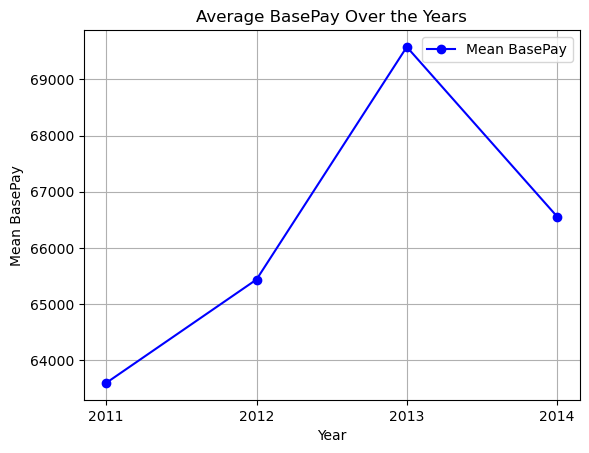

In [65]:
plt.plot(data.index, data.values, marker='o', linestyle='-', color='b', label="Mean BasePay")
plt.xlabel("Year")
plt.ylabel("Mean BasePay")
plt.title("Average BasePay Over the Years")
plt.legend()
plt.grid(True)
plt.show()

<span style="font-size:22px; color:#2c3e50; font-weight:bold;">💼 Which job title has the highest TotalPay?</span>
<br>

Identifying the job title with the highest recorded TotalPay reveals which roles command the greatest earnings, including base salary and additional compensation.

In [66]:
highest_paid_job = df.loc[df['TotalPay'].idxmax(), ['JobTitle', 'TotalPay']]
highest_paid_job

JobTitle    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
TotalPay                                         567595.43
Name: 0, dtype: object

<span style="font-size:22px; color:#2c3e50; font-weight:bold;">⏱️ What percentage of employees receive OvertimePay?</span>
<br>

OvertimePay can indicate staffing demands or workload distribution.  
Let’s examine what proportion of employees are being paid for overtime work.

In [67]:
percent = (df['OvertimePay'] > 0).mean() * 100
print(f"{percent:.2f}% of employees received OvertimePay")

47.98% of employees received OvertimePay


<span style="font-size:22px; color:#2c3e50; font-weight:bold;">💡 Is there a relationship between job type and additional earnings?</span>
<br>

Beyond base salary, many employees receive extra earnings through OvertimePay and OtherPay.  
We'll explore how these vary across different job titles to spot patterns in additional compensation.

In [68]:
top_jobs = df["JobTitle"].value_counts().head(10).index
subset = df[df["JobTitle"].isin(top_jobs)]
avg_extra_pay = subset.groupby("JobTitle")[["OvertimePay", "OtherPay"]].mean()

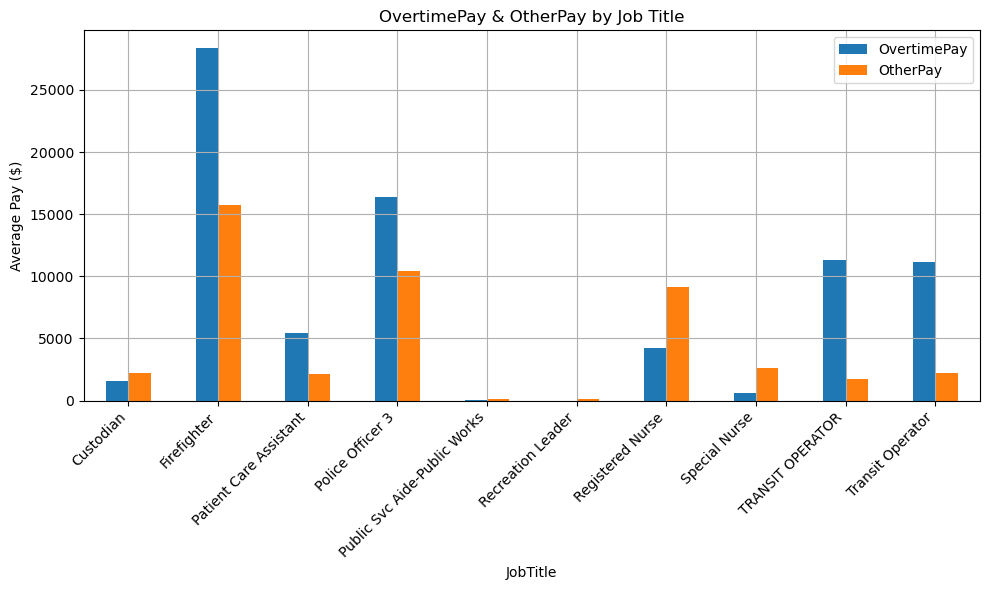

In [69]:
avg_extra_pay.plot(kind="bar", figsize=(10,6), title="OvertimePay & OtherPay by Job Title")
plt.ylabel("Average Pay ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

<span style="font-size:22px; color:#2c3e50; font-weight:bold;">👑 Who is the highest-paid employee?</span>
<br>

Let’s find out which individual earned the most — considering total compensation including salary, overtime, and benefits.

In [70]:
highest_paid = df.loc[df["TotalPayBenefits"].idxmax()]
print("Name:", highest_paid["EmployeeName"])
print("Job Title:", highest_paid["JobTitle"])
print("TotalPayBenefits:", highest_paid["TotalPayBenefits"])

Name: NATHANIEL FORD
Job Title: GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
TotalPayBenefits: 567595.43


<span style="font-size:22px; color:#2c3e50; font-weight:bold;">🎁 Which job titles have the highest average Benefits?</span>
<br>

Benefits can significantly enhance employee compensation.  
Here, we identify which job titles receive the highest average Benefits, highlighting roles with strong non-wage rewards.

In [71]:
avg_benefits = df.groupby("JobTitle")["Benefits"].mean().sort_values(ascending=False).head(10)
print(avg_benefits)

JobTitle
Chief Investment Officer        96570.660000
Gen Mgr, Public Trnsp Dept      82927.026667
Chief, Fire Department          82893.643333
Chief of Police                 82548.620000
Mayor                           78360.376667
Controller                      78310.386667
Dep Dir for Investments, Ret    77138.715000
Adm, SFGH Medical Center        77032.260000
Dept Head V                     75898.814444
Administrator, DPH              74813.575000
Name: Benefits, dtype: float64


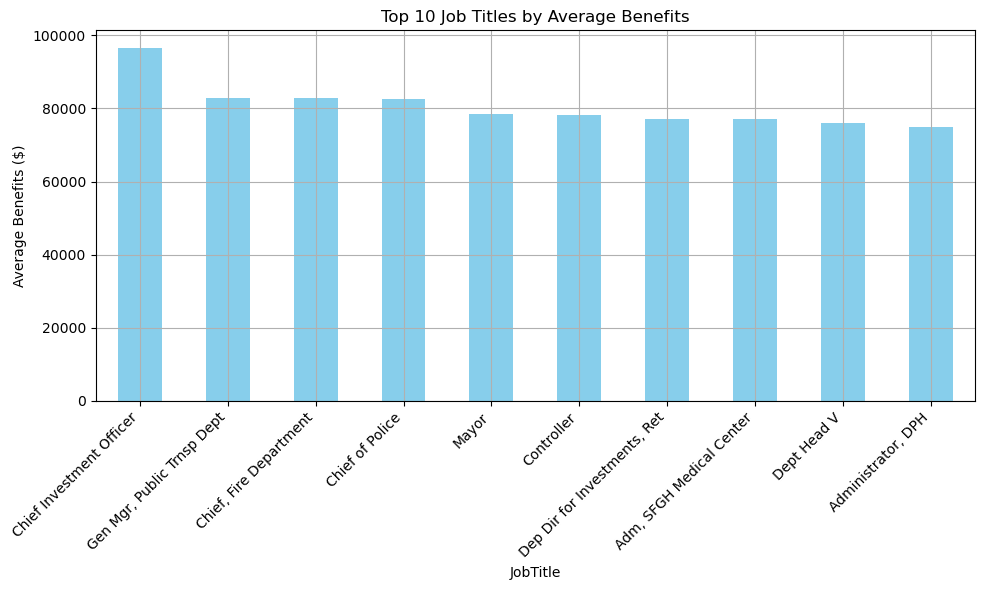

In [72]:
avg_benefits.plot(kind="bar", figsize=(10,6), title="Top 10 Job Titles by Average Benefits", color="skyblue")
plt.ylabel("Average Benefits ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

<span style="font-size:22px; color:#2c3e50; font-weight:bold;">📆 How do employee salaries change over time?</span>
<br>

Understanding how TotalPay evolves over time helps identify financial trends, economic impacts, or policy shifts that affect compensation.  
Let’s track how salaries have changed across the years.

In [73]:
avg_salary_over_time = df.groupby("Year")["TotalPay"].mean()
print(avg_salary_over_time)


Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64


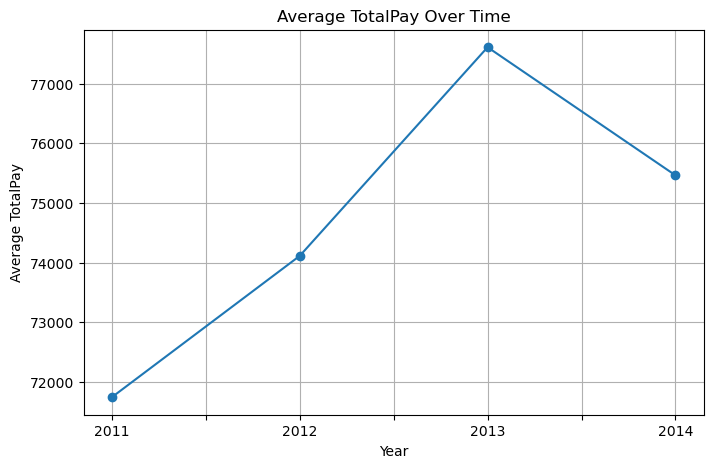

In [74]:
avg_salary_over_time.plot(kind='line', marker='o', figsize=(8,5), title="Average TotalPay Over Time")
plt.xlabel("Year")
plt.ylabel("Average TotalPay")
plt.grid(True)
plt.show()